
# <center><font color= #F08080 > <b>CU25_Modelo de gestión de Lista de Espera Quirúrgica</font></center>

#  <font color='green'>IV. Model development</font>

En este anexo se incluye el código utilizado durante el desarrollo 
de los modelos incluidos en el caso de uso.

## Modelo DES



In [4]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

### Paquetes

In [1]:
#https://r-simmer.org/articles/simmer-06-queueing.html

library(tidyverse)
library(tidymodels)
library(lubridate)
library(modeltime)
library(simmer)
library(simmer.plot)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.2     v purrr   1.0.1
v tibble  3.2.1     v dplyr   1.1.0
v tidyr   1.3.0     v stringr 1.5.0
v readr   2.1.3     v forcats 0.5.2
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
-- Attaching packages -------------------------------------- tidymodels 1.0.0 --

v broom        1.0.3     v rsample      1.1.1
v dials        1.1.0     v tune         1.0.1
v infer        1.0.4     v workflows    1.1.3
v modeldata    1.1.0     v workflowsets 1.0.0
v parsnip      1.0.4     v yardstick    1.1.0
v recipes      1.0.4     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard() masks purrr::discard()
x dplyr::filter()   masks stats::filter()
x recipes::fixed()  masks stringr::fixed()
x dplyr::lag()      masks stats::lag()
x yardstick::spec() masks read

### Datos

In [2]:
modelo_pacientes <- read_rds("modelos_pacientes_xgboost.rds")
modelo_tiempo <- read_rds("modelos_tiempo_xgboost.rds")



capacidad <- read_csv("CU_25_05_07_01_capacidad.csv")

Rows: 160 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): id_area, nombre_area, Especialidad
dbl (1): capacidad

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Spot checking

simmer environment: listasSim | now: 0 | next: 0
{ Monitor: in memory }
{ Resource: quirofano | monitored: TRUE | server status: 0(6) | queue status: 0(Inf) }
{ Source: inicial | monitored: 1 | n_generated: 0 }
{ Source: paciente | monitored: 1 | n_generated: 0 }

simmer environment: listasSim | now: 365 | next: 370.546641111228
{ Monitor: in memory }
{ Resource: quirofano | monitored: TRUE | server status: 6(6) | queue status: 304(Inf) }
{ Source: inicial | monitored: 1 | n_generated: 343 }
{ Source: paciente | monitored: 1 | n_generated: 31 }

resource,time,server,queue,capacity,queue_size,system,limit,replication
<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
quirofano,0,1,0,6,Inf,1,Inf,1
quirofano,0,2,0,6,Inf,2,Inf,1
quirofano,0,3,0,6,Inf,3,Inf,1
quirofano,0,4,0,6,Inf,4,Inf,1
quirofano,0,5,0,6,Inf,5,Inf,1
quirofano,0,6,0,6,Inf,6,Inf,1
quirofano,0,6,1,6,Inf,7,Inf,1
quirofano,0,6,2,6,Inf,8,Inf,1
quirofano,0,6,3,6,Inf,9,Inf,1


name,start_time,end_time,activity_time,finished,replication
<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<int>
inicial5,0,12.49577,12.495766,TRUE,1
inicial0,0,14.61021,14.610211,TRUE,1
inicial4,0,43.17610,43.176097,TRUE,1
inicial1,0,49.87241,49.872410,TRUE,1
inicial8,0,55.18389,12.007793,TRUE,1
inicial9,0,59.45241,9.579996,TRUE,1
inicial10,0,73.59897,18.415080,TRUE,1
inicial6,0,74.16483,61.669062,TRUE,1
inicial11,0,84.30607,24.853666,TRUE,1


Warning message:
“Removed 1029 rows containing missing values (`geom_line()`).”


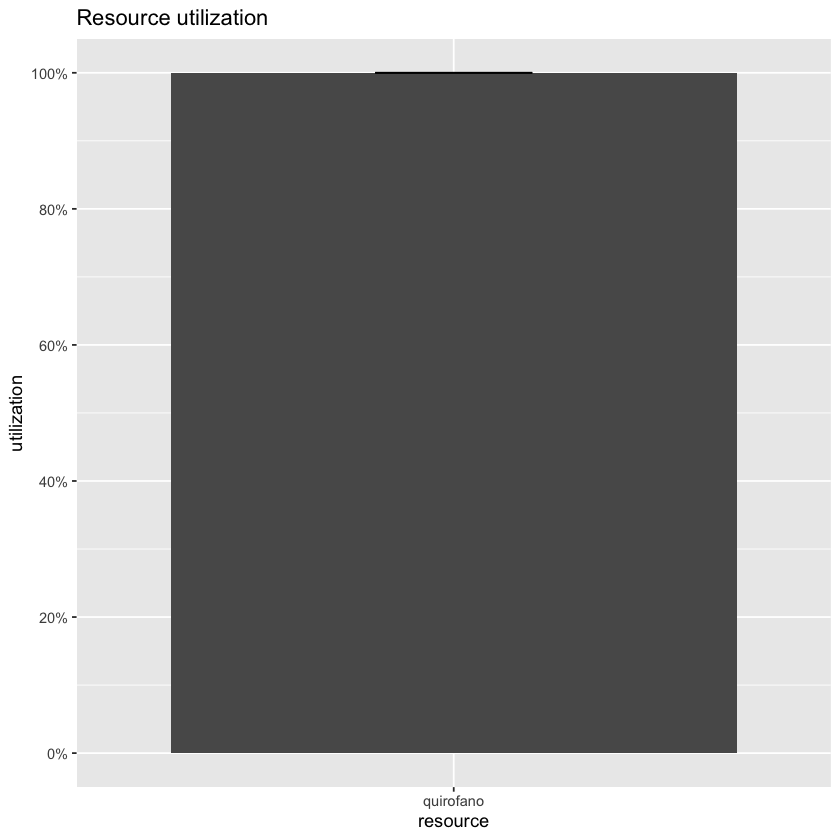

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 311 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 311 rows containing missing values (`geom_line()`).”


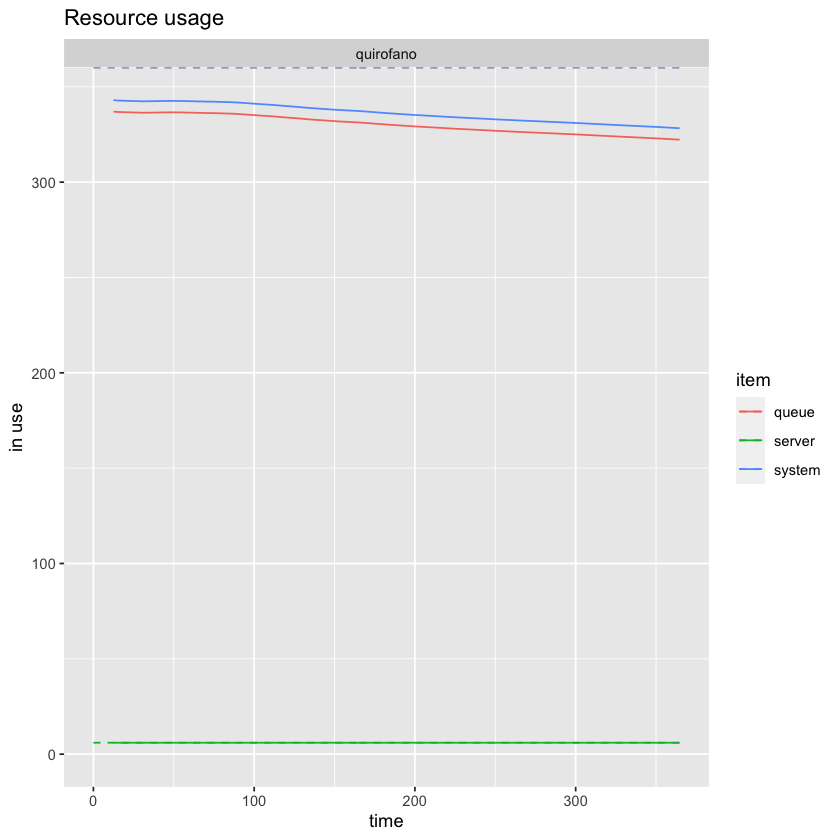

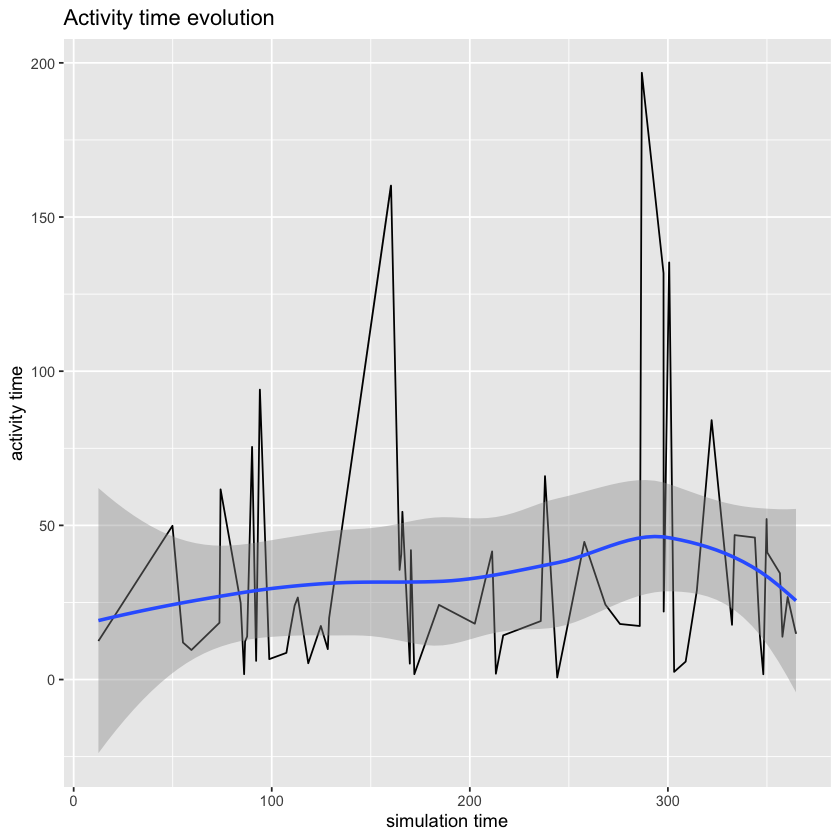

In [5]:




## Ejemplo base

# h <- "HOSPITAL UNIVERSITARIO LA PAZ"
# a <- "05"
e <- "Angiología y Cirugía Vascular"
z <- "Centro-Norte"

s <- paste(z, e, sep = ".")
h <- 2
cap <- capacidad |> 
  filter(nombre_area == z,
         Especialidad == e) |> 
  pull(capacidad)

NPER <- 365  
  
## Si se elige último
pacientes_en_cola <- modelo_pacientes |> 
  pluck(s, ".calibration_data", 1) |> 
  slice_max(fecha) |> 
  pull(.actual)

tiempo_medio_en_cola <- modelo_tiempo |> 
  pluck(s, ".calibration_data", 1) |> 
  slice_max(fecha) |> 
  pull(.actual)

## Si se elige predicción 

pacientes_en_cola <- modelo_pacientes |> 
  pluck(s) |>
  modeltime_forecast(h = h) |> 
  slice_tail(n = 1) |> pull(.value)

tiempo_medio_en_cola <- modelo_tiempo |> 
  pluck(s) |>
  modeltime_forecast(h = h) |> 
  slice_tail(n = 1) |> pull(.value)


## Parámetros
## Llegadas

lambda <- pacientes_en_cola / tiempo_medio_en_cola

## Tiempo de servicio
mu <- lambda/pacientes_en_cola

## Capacidad es cap



library(simmer)
#set.seed(1) no usar en la app para que salgan cosas distintas al cambiar

env <- simmer("listasSim")
# env

paciente <- trajectory("Trayectoria del paciente") %>%
  ## Operación
  seize("quirofano", 1) %>%
  timeout(function() rexp(1, mu)) %>%
  release("quirofano", 1)

env %>%
  add_resource("quirofano", cap) %>%
  add_generator("inicial", paciente, at(rep(0, pacientes_en_cola))) |> 
  add_generator("paciente", paciente, function() rpois(1, lambda))


env %>% 
  run(NPER)

# env %>% peek(3)

#Esto de momento no
# library(parallel)
# envs <- mclapply(1:100, function(i) {
#   simmer("listassim100") %>%
#     add_resource("quirofano", cap) %>%
#     add_generator("inicial", paciente, at(rep(0, pacientes_en_cola))) |> 
#     add_generator("paciente", paciente, function() rpois(1, lambda)) |> 
#     run(NPER) %>%
#     wrap()
# })
# 
# resources <- get_mon_resources(envs)
# plot(resources, metric = "utilization")
# plot(resources, metric = "usage", c("quirofano"))


## Mostrar con datatable
recursos <- get_mon_resources(env)
recursos

llegadas <- get_mon_arrivals(env, ongoing = TRUE)
llegadas

## Mostrar estos gráficos

plot(recursos, metric = "utilization")
plot(recursos, metric = "usage", c("quirofano"))

plot(llegadas)








## Lista simmer

In [6]:
library(tidyverse)
library(xgboost)
library(simmer)

modelo_pacientes <- read_rds("modelos_pacientes_xgboost.rds")
modelo_tiempo <- read_rds("modelos_tiempo_xgboost.rds")

e <- "Angiología y Cirugía Vascular"
z <- "Centro-Norte"

s <- paste(z, e, sep = ".")
h <- 2

# ultimo <- modelo_pacientes[[m]]$.calibration_data[[1]]

pacientes_en_cola <- modelo_pacientes |> 
  pluck(s, ".calibration_data", 1) |> 
  slice_max(fecha) |> 
  pull(.actual)

tiempo_medio_en_cola <- modelo_tiempo |> 
  pluck(s, ".calibration_data", 1) |> 
  slice_max(fecha) |> 
  pull(.actual)



lambda <- pacientes_en_cola / tiempo_medio_en_cola

## Tiempo de servicio
mu <- lambda/pacientes_en_cola

## Capacidad
m <- 2


set.seed(1)
env |> reset()
env <- simmer("listasSim")
env


paciente <- trajectory("Trayectoria del paciente") %>%
  ## Operación
  seize("quirofano", 1) %>%
  timeout(function() rexp(1, mu)) %>%
  release("quirofano", 1)

paciente

env %>%
  add_resource("quirofano", m) %>%
  add_generator("inicial", paciente, at(rep(0, pacientes_en_cola))) %>%
  # add_generator("inicial", paciente, at(rep(0, pacientes_en_cola))) |>
  add_generator("paciente", paciente, function() rpois(1, lambda))


env %>% 
  run(10000) 

llegadas <- env |> get_mon_arrivals(ongoing = TRUE)
cola <- env |> get_mon_resources()
# env |> get_mon_attributes()






Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




simmer environment: listasSim | now: 0 | next: 0
{ Monitor: in memory }
{ Resource: quirofano | monitored: TRUE | server status: 0(6) | queue status: 0(Inf) }
{ Source: inicial | monitored: 1 | n_generated: 0 }
{ Source: paciente | monitored: 1 | n_generated: 0 }

simmer environment: listasSim | now: 0 | next: 
{ Monitor: in memory }

trajectory: Trayectoria del paciente, 3 activities
{ Activity: Seize        | resource: quirofano, amount: 1 }
{ Activity: Timeout      | delay: function() }
{ Activity: Release      | resource: quirofano, amount: 1 }

simmer environment: listasSim | now: 0 | next: 0
{ Monitor: in memory }
{ Resource: quirofano | monitored: TRUE | server status: 0(2) | queue status: 0(Inf) }
{ Source: inicial | monitored: 1 | n_generated: 0 }
{ Source: paciente | monitored: 1 | n_generated: 0 }

simmer environment: listasSim | now: 10000 | next: 10010
{ Monitor: in memory }
{ Resource: quirofano | monitored: TRUE | server status: 2(2) | queue status: 587(Inf) }
{ Source: inicial | monitored: 1 | n_generated: 364 }
{ Source: paciente | monitored: 1 | n_generated: 882 }